# CS 109A/AC 209A/STAT 121A Data Science: Final Project
**Harvard University**<br>
**Fall 2016**<br>
**Instructors:** W. Pan, P. Protopapas, K. Rader<br>
**Members: ** Shawn Pan, Xinyuan (Amy) Wang, Ming-long Wu

## Remark - 042_predictor_selection ##
- Check scatter plots of several predictor matrix
- Recursive Feature Selection


In [2]:
import time
import pandas as pd
import numpy as np
import scipy as sp
from scipy.signal import savgol_filter
from scipy.stats import mode
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib import colors
import matplotlib.dates as mdates
from datetime import datetime
from collections import Counter
from mpl_toolkits.basemap import Basemap
import statsmodels.api as sm
from sklearn import preprocessing
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
%matplotlib inline

### Load data

In [3]:
# Load listing data
listing = pd.read_csv('../../Data/data_preprocessed.csv')
print(listing.columns.values)
listing.head()

['id' 'host_since' 'zipcode' 'latitude' 'longitude' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'guests_included' 'minimum_nights'
 'maximum_nights' 'availability_30' 'availability_60' 'availability_90'
 'availability_365' 'number_of_reviews' 'first_review' 'last_review'
 'review_scores_rating' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'host_listing_count' 'price' 'property_type_0'
 'property_type_1' 'property_type_2' 'property_type_3' 'property_type_4'
 'property_type_5' 'room_type_0' 'room_type_1' 'room_type_2' 'bed_type_0'
 'bed_type_1' 'bed_type_2' 'bed_type_3' 'bed_type_4']


,id,host_since,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,...,property_type_4,property_type_5,room_type_0,room_type_1,room_type_2,bed_type_0,bed_type_1,bed_type_2,bed_type_3,bed_type_4
0,1069266,1926,10022.0,40.756852,-73.964754,2,1.0,1.0,1.0,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1846722,1625,10530.0,40.830599,-73.941014,10,1.0,3.0,3.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2061725,1831,11221.0,40.692189,-73.924120,2,1.0,1.0,2.0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,44974,953,10011.0,40.734751,-74.002592,2,1.0,1.0,1.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4701675,2479,10011.0,40.745282,-73.997836,2,1.0,1.0,2.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Check scatter plots of several predictor matrix
- **None of the pair checked has high correlation.**

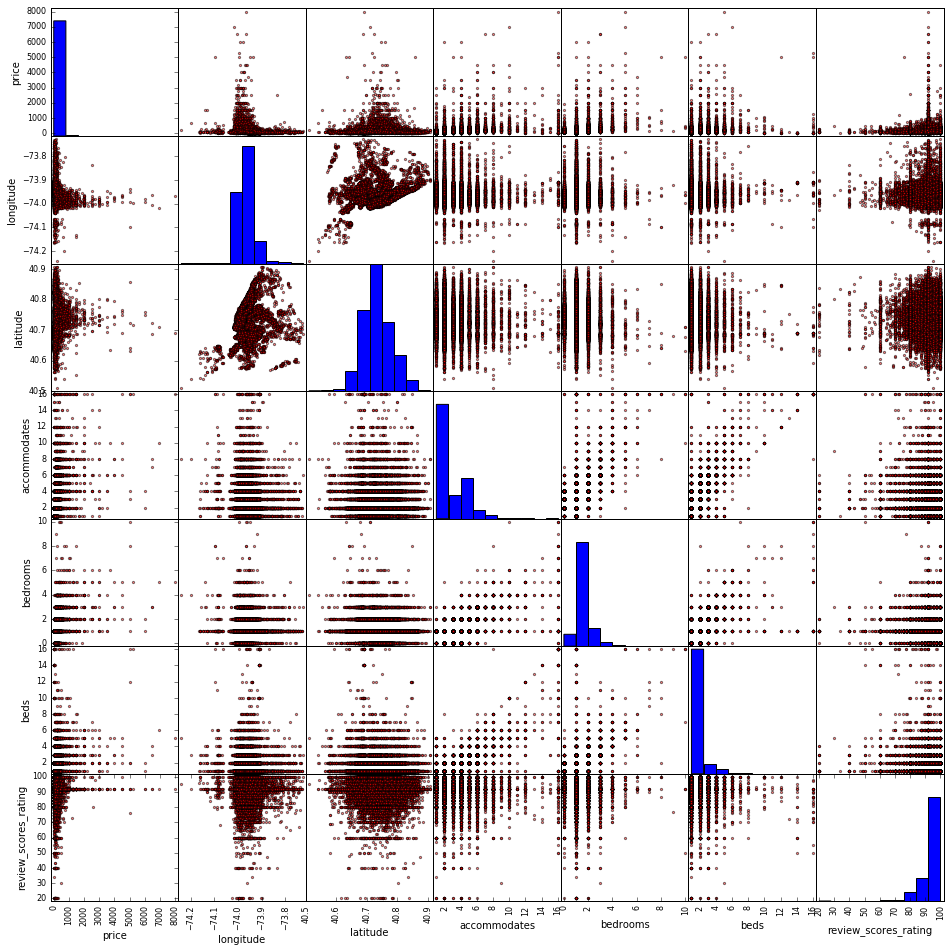

In [4]:
# Scatter plot of several predictors
scattercols = ['price','longitude','latitude','accommodates','bedrooms','beds','review_scores_rating']
axs = pd.scatter_matrix(listing[scattercols],
figsize=(16, 16), c='red')

### Recursive Feature Selection ###

In [5]:
# Get x and y
x = listing
x = x.drop('price', axis=1)
x = x.drop('id', axis=1)
y = listing['price']
print x.shape
print y.shape

(27392, 40)
(27392,)


In [6]:
# RFE
#RFE(estimator, n_features_to_select=None, step=1, verbose=0)
model = LinearRegression()

selector = RFE(model, n_features_to_select=1)
selector.fit(x, np.log(y))
print selector.support_
print selector.ranking_

[False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[39 36  2  1 14  8  6 15 32 28 40 35 29 30 34 33 37 38 31 25 24 16 18 13 17
 26 23 22  9 11  7  4  3 10  5 21 12 27 20 19]


In [7]:
#ranking - if you keep out all predictors except 1
print "Order of Predictor Importance:"
print "--------------------"
for c in x.columns[np.argsort(selector.ranking_)]:
    print c

Order of Predictor Importance:
--------------------
longitude
latitude
room_type_0
property_type_5
room_type_2
bedrooms
property_type_4
bathrooms
property_type_2
room_type_1
property_type_3
bed_type_1
review_scores_location
accommodates
beds
review_scores_checkin
review_scores_value
review_scores_communication
bed_type_4
bed_type_3
bed_type_0
property_type_1
property_type_0
review_scores_cleanliness
review_scores_accuracy
host_listing_count
bed_type_2
minimum_nights
availability_60
availability_90
review_scores_rating
guests_included
number_of_reviews
availability_365
availability_30
zipcode
first_review
last_review
host_since
maximum_nights


In [8]:
# Check predictors selected if we set n_features_to_select=20
model = LinearRegression()
selector = RFE(model, n_features_to_select=20)
selector.fit(x, np.log(y))

print x.columns[selector.support_]
x2 = x[x.columns[selector.support_]]


Index([u'latitude', u'longitude', u'accommodates', u'bathrooms', u'bedrooms',
       u'beds', u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_value', u'property_type_2',
       u'property_type_3', u'property_type_4', u'property_type_5',
       u'room_type_0', u'room_type_1', u'room_type_2', u'bed_type_1',
       u'bed_type_3', u'bed_type_4'],
      dtype='object')


### Use Lasso to shrink the predictors ##
- First, we split our training dataset into train data and test data.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x2, np.log(y), test_size=0.3, random_state=0)

# Use Lasso to shrink Predictors

In [10]:
#Step to convert longitude and latitude to price cluster by KNN
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neighbors import KNeighborsRegressor

class LocationPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = KNeighborsRegressor(n_neighbors=50, weights="uniform")
        super(LocationPreprocessor, self).__init__()
        
    def fit_transform(self, X, y):
        self.model.fit(X[["longitude", "latitude"]], y)
        return self.transform(X)
    
    def transform(self, X):
        loc = self.model.predict(X[["longitude", "latitude"]])
        Xnew = X.copy()
        Xnew["location"] = loc
        return Xnew

In [12]:
#fit Lasso model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

model = Pipeline([
            ("location", LocationPreprocessor()),
            ("normalize", StandardScaler()),
            ("lasso", Lasso(alpha=0.05))
        ])

model.fit(x_train, y_train)
print "Train Score", model.score(x_train, y_train)
print "Test Score", model.score(x_test, y_test)
print

coef = model.named_steps["lasso"].coef_
columns = list(x.columns) + ["location"]
print "Features Selected by Lasso:"
for col, beta in zip(columns, coef):
    if beta != 0:
        print col

Train Score 0.626531795601
Test Score 0.620417468043

Features Selected by Lasso:
latitude
longitude
accommodates
availability_365
first_review
review_scores_cleanliness
